# Lab 1

## Exploring Data

In [61]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm
from pandas.plotting import parallel_coordinates
from ChernoffFace import *

In [2]:
# data from csv
auto_df = pd.read_csv('ST83446_Auto-mpg_dataset.csv')

In [3]:
auto_df.shape

(54, 9)

In [4]:
#peak inside
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Car model
0,15.0,8,383,170,3563,10.0,70,1,dodge
1,15.0,8,400,150,3761,9.5,70,1,chevrolet
2,14.0,8,455,225,3086,10.0,70,1,buick
3,21.0,6,200,85,2587,16.0,70,1,ford
4,27.0,4,97,88,2130,14.5,70,3,datsun


In [5]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
Car model        object
dtype: object

## Data Correction

*From Specification.txt*

Attribute Information:

* mpg: continuous
* cylinders: multi-valued discrete
* displacement: continuous
* horsepower: continuous
* weight: continuous
* acceleration: continuous
* model year: multi-valued discrete
* origin: multi-valued discrete
* car name: string (unique for each instance)
* Missing Attribute Values: horsepower has 6 missing values

In [6]:
mask = auto_df.isin(['?']).any()
print(mask)

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
Car model       False
dtype: bool


In [7]:
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
Car model       0
dtype: int64

In [8]:
auto_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
Car model       0
dtype: int64

No need to handle null/missing values

In [9]:
# adjustment for continous. discrete needs to be adjusted to category
auto_df['displacement'] = auto_df['displacement'].astype('float')
auto_df['horsepower'] = auto_df['horsepower'].astype('float')
auto_df['weight'] = auto_df['weight'].astype('int')
auto_df['cylinders'] = auto_df['cylinders'].astype('category')
auto_df['origin'] = auto_df['origin'].astype('category')
auto_df['Car model'] = auto_df['Car model'].astype('category')

In [10]:
auto_df.dtypes

mpg              float64
cylinders       category
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin          category
Car model       category
dtype: object

## Data Visualization


### Histograms

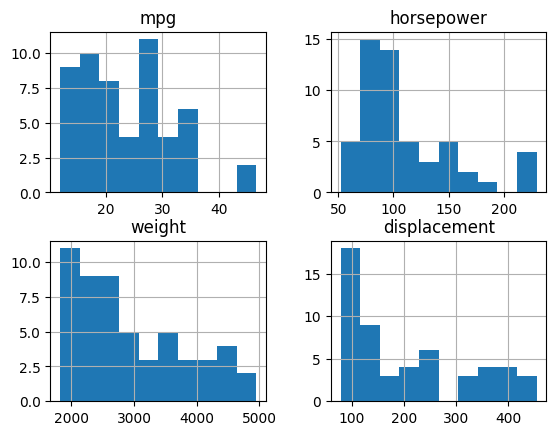

In [11]:
auto_df[['mpg','horsepower','weight','displacement']].hist();


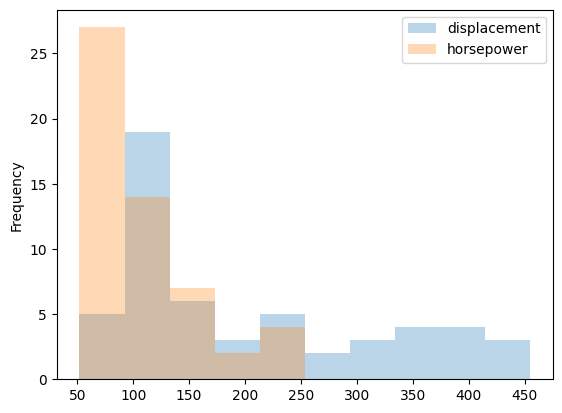

In [12]:
auto_df[['displacement','horsepower']].plot.hist(histtype = "stepfilled", bins=10, alpha=0.3);

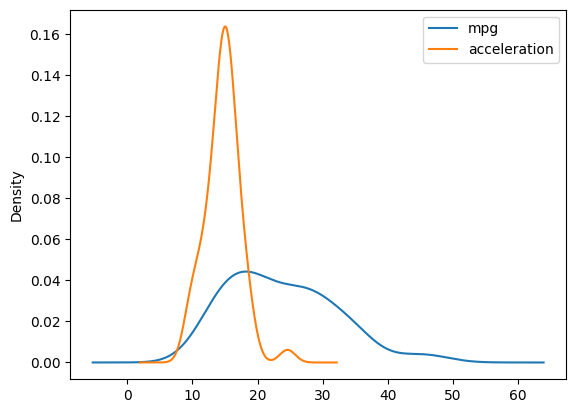

In [13]:
auto_df[['mpg','acceleration']].plot.density();

In [14]:
auto_df['Car model'].value_counts()

Car model
chevrolet      6
buick          5
plymouth       4
datsun         4
dodge          4
amc            3
volkswagen     3
chrysler       3
toyota         3
ford           3
pontiac        3
mazda          2
mercury        2
volvo          1
renault        1
honda          1
oldsmobile     1
audi           1
fiat           1
cadillac       1
bmw            1
vw             1
Name: count, dtype: int64

In [15]:
auto_df['origin'].value_counts()

origin
1    35
3    10
2     9
Name: count, dtype: int64

In [16]:
auto_df['cylinders'].value_counts()

cylinders
4    29
8    14
6    11
Name: count, dtype: int64

### Box Plots for Cylinders and Countries

In [17]:
# helper functions for mask for parameter
def masked_cylinder_auto(column: str) -> list:
    mask = [auto_df[auto_df['cylinders']== 4][column],
            auto_df[auto_df['cylinders']== 6][column],
            auto_df[auto_df['cylinders']== 8][column],
    ]
    return mask

def masked_origin_auto(column: str) -> list:
    mask = [auto_df[auto_df['origin']== 1][column],
            auto_df[auto_df['origin']== 2][column],
            auto_df[auto_df['origin']== 3][column],
    ]
    return mask

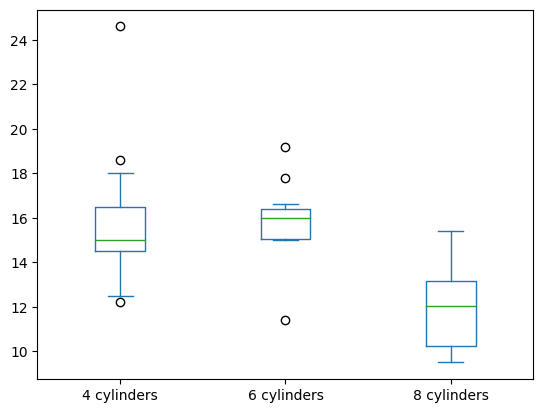

In [18]:
cylinder_labels = ("4 cylinders", "6 cylinders", "8 cylinders")
pd.DataFrame(masked_cylinder_auto("acceleration"),
              index=cylinder_labels).T.plot.box(whis=1);

<Axes: >

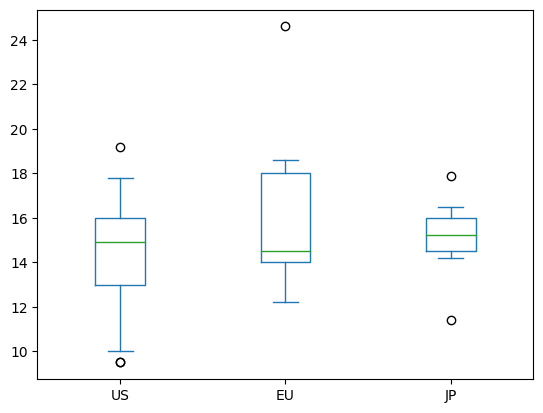

In [19]:
origin_lables = ('US','EU','JP')
pd.DataFrame(masked_origin_auto("acceleration"),
             index=origin_lables).T.plot.box(whis=1)

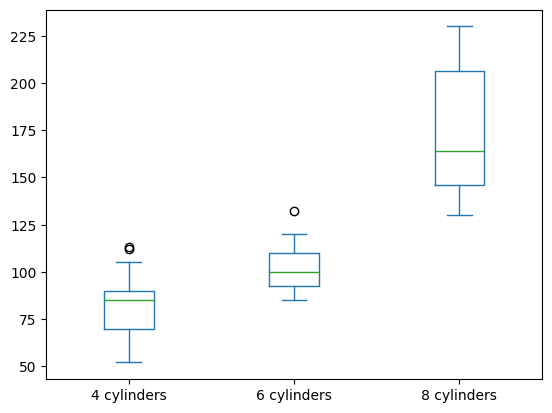

In [20]:
pd.DataFrame(masked_cylinder_auto("horsepower"),
            index=cylinder_labels).T.plot.box(whis=1);

<Axes: >

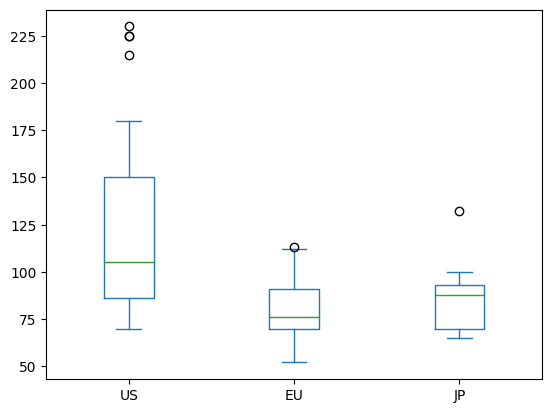

In [21]:
origin_lables = ('US','EU','JP')
pd.DataFrame(masked_origin_auto("horsepower"),
             index=origin_lables).T.plot.box(whis=1)

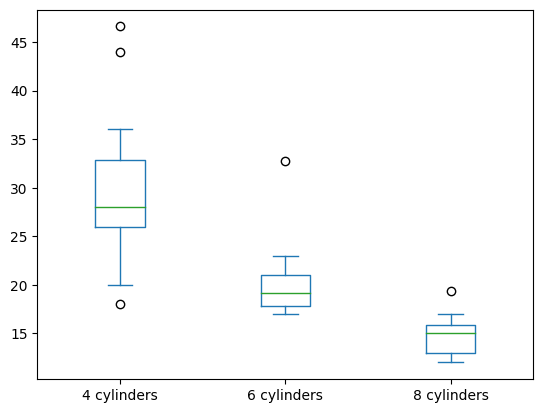

In [22]:
pd.DataFrame(masked_cylinder_auto('mpg'),
            index=cylinder_labels).T.plot.box(whis=1);

<Axes: >

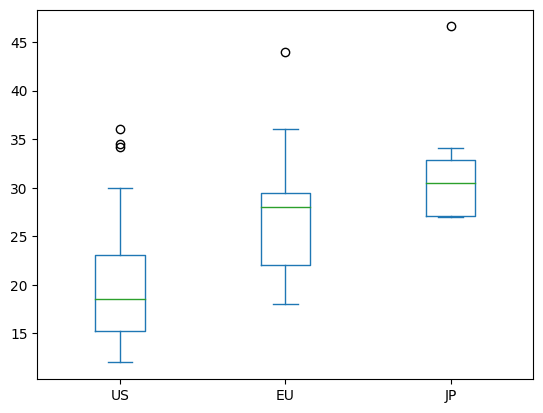

In [23]:
origin_lables = ('US','EU','JP')
pd.DataFrame(masked_origin_auto("mpg"),
             index=origin_lables).T.plot.box(whis=1)

<Axes: >

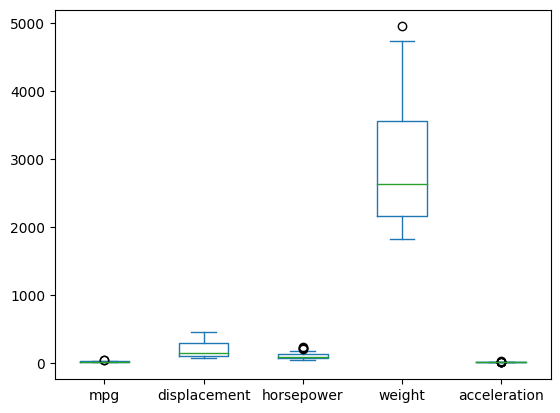

In [24]:
auto_df[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]].plot.box(whis=1)

<Axes: >

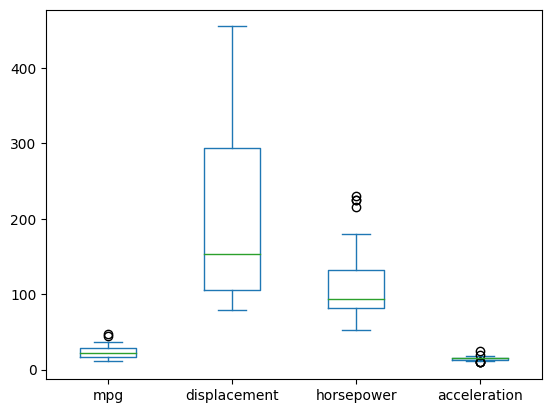

In [25]:
auto_df[["mpg", "cylinders", "displacement", "horsepower", "acceleration"]].plot.box(whis=1)

### Paralled Coordinates for Cylinders and Countries

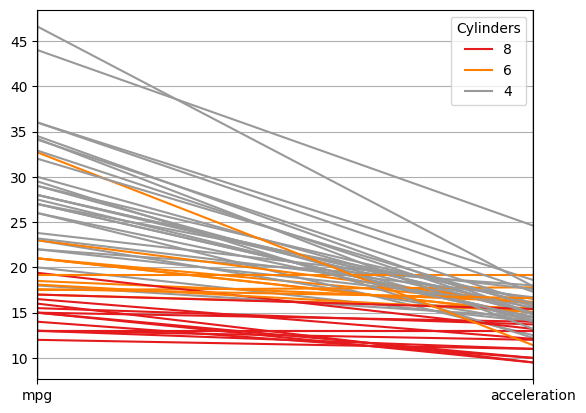

In [26]:
parallel0_df = auto_df[['cylinders','mpg','acceleration']]
parallel_coordinates(parallel0_df, 'cylinders', colormap=plt.get_cmap("Set1"))
plt.legend(title='Cylinders')
plt.show()

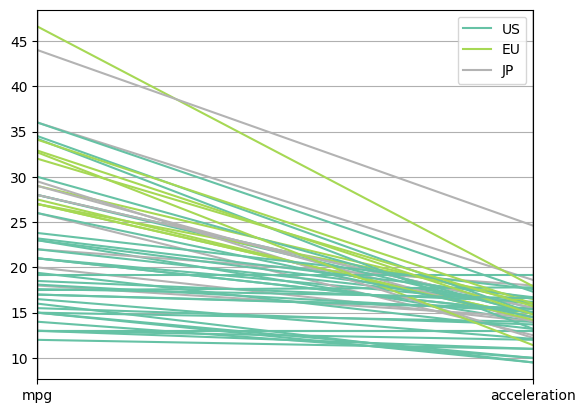

In [27]:
parallel1_df = auto_df[['origin','mpg','acceleration']]
parallel_coordinates(parallel1_df, 'origin', colormap=plt.get_cmap("Set2"))
handles, labels = plt.gca().get_legend_handles_labels()
renamed_labels = [x for x in origin_lables]
plt.legend(handles, renamed_labels)
plt.show()

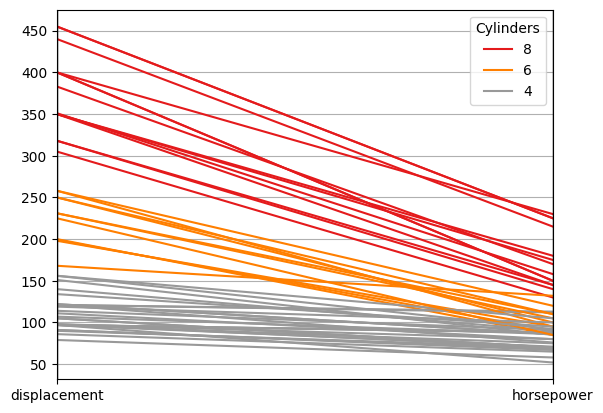

In [28]:
parallel2_df = auto_df[['cylinders','displacement','horsepower']]
parallel_coordinates(parallel2_df, 'cylinders', colormap=plt.get_cmap("Set1"))
plt.legend(title='Cylinders')
plt.show()

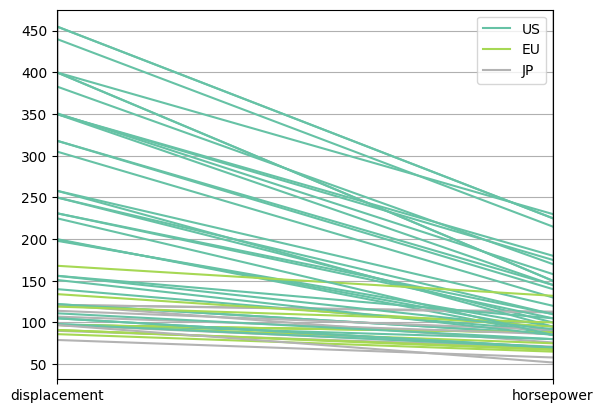

In [29]:
paralled3_df = auto_df[['origin','displacement','horsepower']]
parallel_coordinates(paralled3_df,'origin',colormap=plt.get_cmap("Set2"))
handles, labels = plt.gca().get_legend_handles_labels()
renamed_labels = [x for x in origin_lables]
plt.legend(handles, renamed_labels)
plt.show()

### Chernoff Faces for models

In [33]:
auto_df.dtypes

mpg              float64
cylinders       category
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin          category
Car model       category
dtype: object

In [88]:
chernoff_data = auto_df[["Car model","mpg","displacement","horsepower","weight","acceleration"]].groupby(["Car model"]).mean()

In [119]:
rescaled_df = variables_rescale(chernoff_data.reset_index())
rescaled_df.head()

,Car model,mpg,displacement,horsepower,weight,acceleration
0,amc,0.086061,0.587946,0.388021,0.492629,0.309333
1,audi,0.127273,0.129151,0.304688,0.296282,0.152000
2,bmw,0.345455,0.154982,0.476562,0.160078,0.032000
3,buick,0.054545,0.890775,0.867188,0.642348,0.052800
4,cadillac,0.000000,1.000000,1.000000,1.000000,0.000000


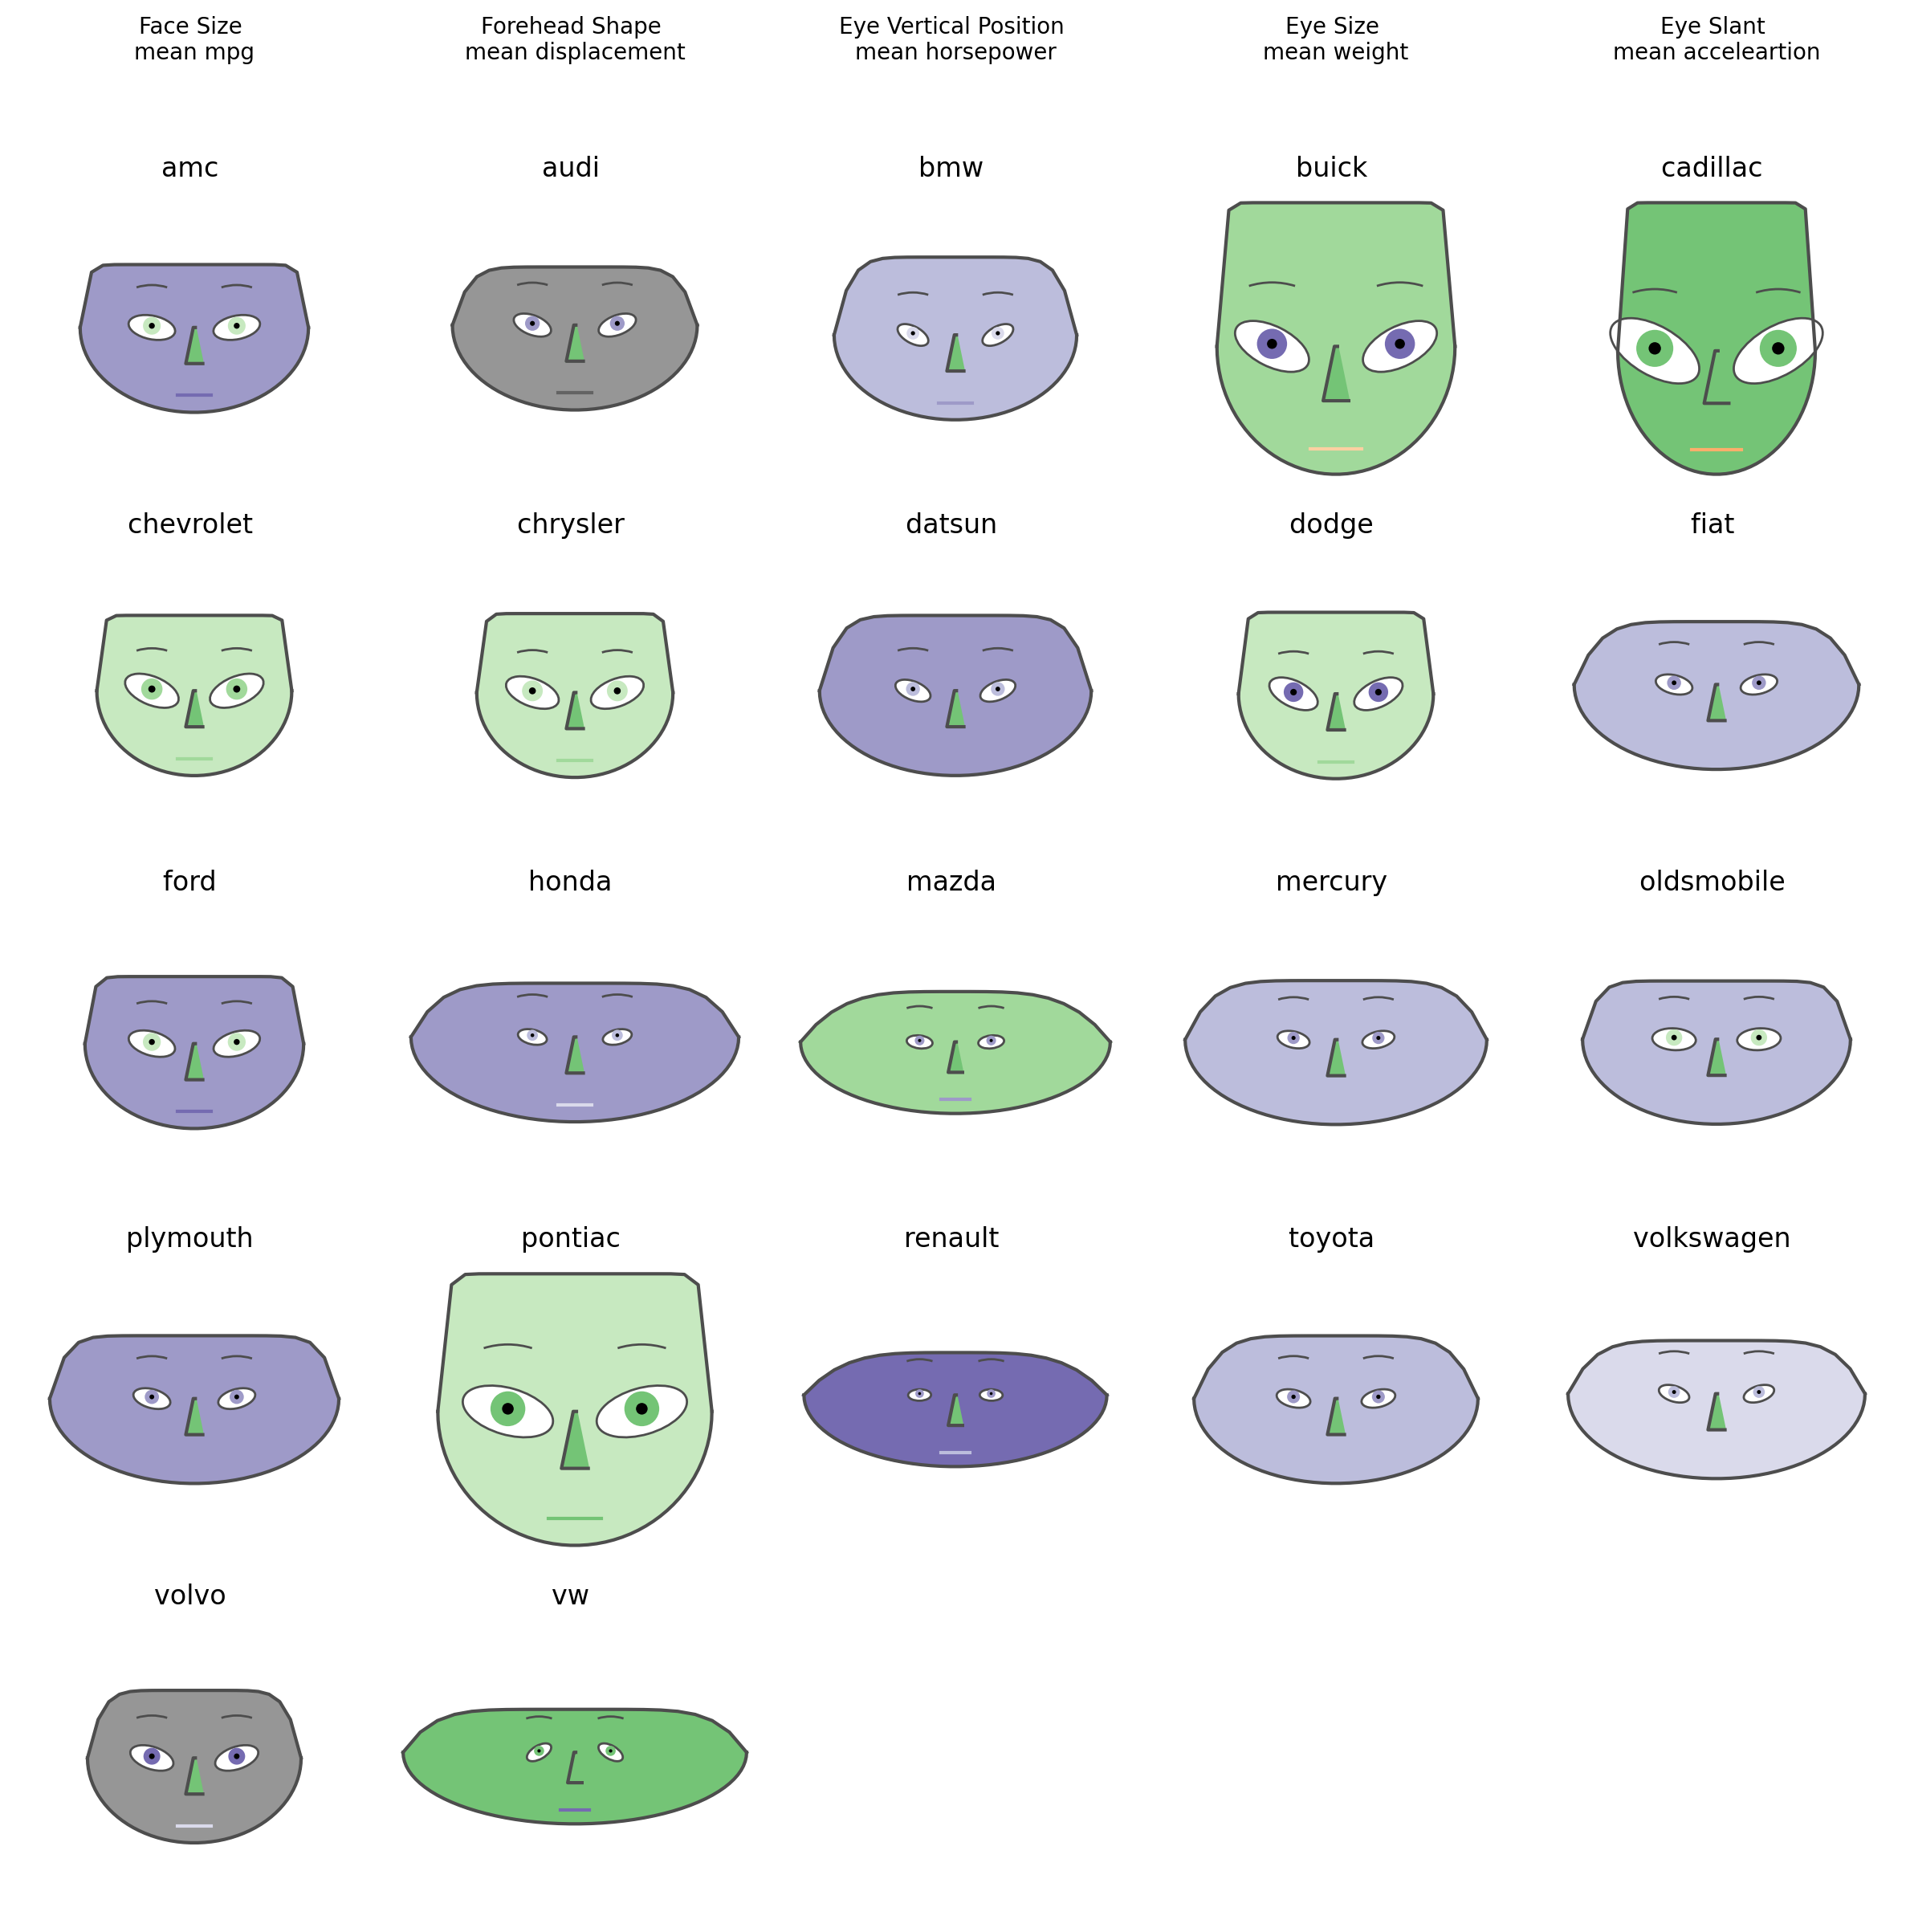

In [121]:
fig = chernoff_face(data=rescaled_df,
                    n_columns=5,
                    long_face=False,
                    color_mapper=matplotlib.cm.tab20c_r,
                    figsize=(12,12), dpi =200)
axes = fig.get_axes()

label_positions = [(.5, 1.5), (.5, 1.5), (.5, 1.5), (.5, 1.5), (.5, 1.5)]  
label_text = ['Face Size \nmean mpg', 'Forehead Shape \nmean displacement', 
                'Eye Vertical Position \nmean horsepower', 'Eye Size \nmean weight'
                , 'Eye Slant \nmean acceleartion']  # Example labels

# Add labels to each axis
for ax, pos, label in zip(axes, label_positions, label_text):
    x, y = pos
    ax.text(x, y, label, ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Adjust layout (optional)
plt.tight_layout()

# Display the plot
plt.show()